Plotting ChIP-seq data

In [1]:
import seaborn as sns
from omniplot import chipseq as ochip
import pandas as pd

Download data for demonstration. </br>
```bash

wget https://www.encodeproject.org/files/ENCFF406SHU/@@download/ENCFF406SHU.bigWig
mv ENCFF406SHU.bigWig KMT2A_ENCFF406SHU.bigWig
wget https://www.encodeproject.org/files/ENCFF709UTL/@@download/ENCFF709UTL.bigWig
mv ENCFF709UTL.bigWig KMT2B_ENCFF709UTL.bigWig
wget https://www.encodeproject.org/files/ENCFF397BTX/@@download/ENCFF397BTX.bigWig
mv ENCFF397BTX.bigWig HNF1A_rep1_ENCFF397BTX.bigWig
wget https://www.encodeproject.org/files/ENCFF502ACF/@@download/ENCFF502ACF.bigWig
mv ENCFF502ACF.bigWig HNF1A_rep2_ENCFF502ACF.bigWig
wget https://www.encodeproject.org/files/ENCFF960SAF/@@download/ENCFF960SAF.bed.gz
gunzip ENCFF960SAF.bed.gz
mv ENCFF960SAF.bed KMT2A_peaks_ENCFF960SAF.bed
bedtools sort -i KMT2A_peaks_ENCFF960SAF.bed > KMT2A_peaks_ENCFF960SAF_srt.bed  # alternatively, sort -k1,1 -k2,2n KMT2A_peaks_ENCFF960SAF.bed > KMT2A_peaks_ENCFF960SAF_srt.bed
wget https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_42/gencode.v42.annotation.gff3.gz
gunzip gencode.v42.annotation.gff3.gz
```

Creating a correlation map between samples

[[0.         0.90717417 0.38387275 0.13436021]
 [0.90717417 0.         0.38325126 0.15572685]
 [0.38387275 0.38325126 0.         0.8539526 ]
 [0.13436021 0.15572685 0.8539526  0.        ]]


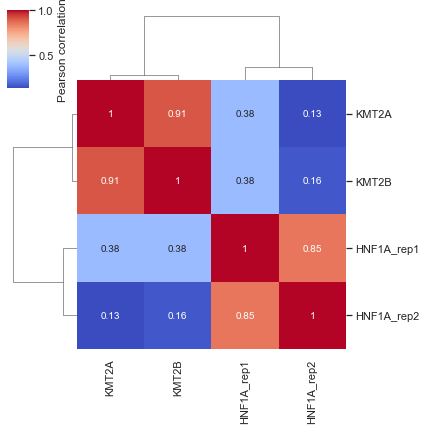

In [3]:
#create dictionary of which keys are sample names and values are bigwig file
fs= {"KMT2A":"KMT2A_ENCFF406SHU.bigWig",
    "KMT2B":"KMT2B_ENCFF709UTL.bigWig",
    "HNF1A_rep1":"HNF1A_rep1_ENCFF397BTX.bigWig",
    "HNF1A_rep2":"HNF1A_rep2_ENCFF502ACF.bigWig",}
        
res=ochip.plot_bigwig_correlation(fs,step=1000)

Drawing a heatmap of peaks aligned with the peak centers

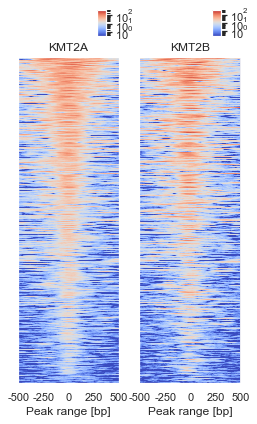

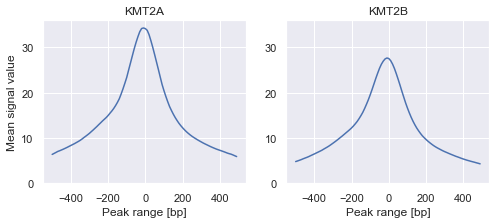

In [4]:
peak="KMT2A_peaks_ENCFF960SAF_srt.bed"
files={"KMT2B":"KMT2B_ENCFF709UTL.bigWig",
                    "KMT2A":"KMT2A_ENCFF406SHU.bigWig"}
res=ochip.plot_average(files=files,
            bed=peak,
            order=["KMT2A",  "KMT2B"],
            )

With kmean clustering

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


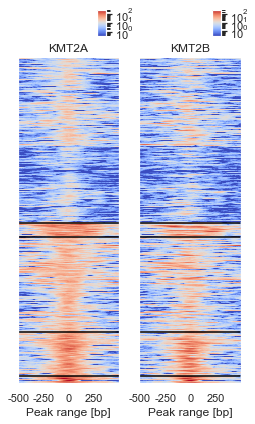

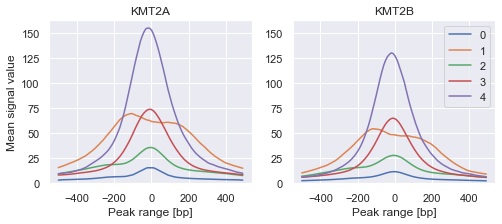

In [2]:
peak="KMT2A_peaks_ENCFF960SAF_srt.bed"
files={"KMT2B":"KMT2B_ENCFF709UTL.bigWig",
                    "KMT2A":"KMT2A_ENCFF406SHU.bigWig"}
res=ochip.plot_average(files=files,
            bed=peak,
            order=["KMT2A",  "KMT2B"],
                       clustering="kmeans",
                       n_clusters=5,)

Calculating the best cluster numbers for kmean clustering

Top two optimal cluster No are: 3, 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


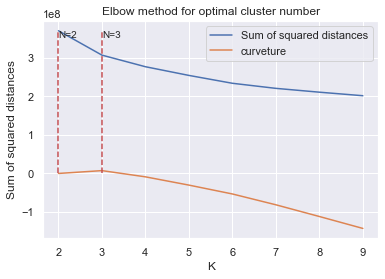

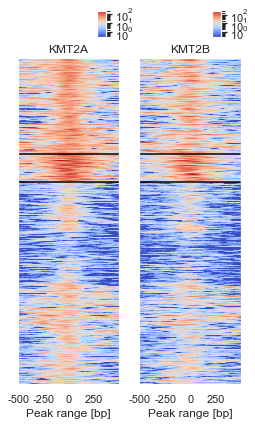

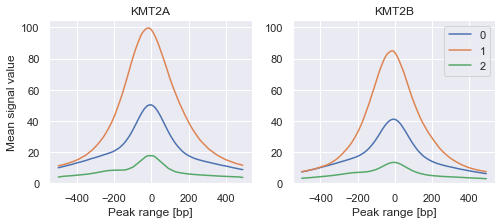

In [4]:
peak="KMT2A_peaks_ENCFF960SAF_srt.bed"
files={"KMT2B":"KMT2B_ENCFF709UTL.bigWig",
                    "KMT2A":"KMT2A_ENCFF406SHU.bigWig"}
res=ochip.plot_average(files=files,
            bed=peak,
            order=["KMT2A",  "KMT2B"],
                       clustering="kmeans_auto",
                       )

Creating a region-of-interest bed file for drawing signals
```bash
echo -e chr5"\t"112827904"\t"113040977"\n"chr8"\t"66403269"\t"66439215 > roi.bed
```

Drawing the sigals within the ROI.

0.06641483306884766


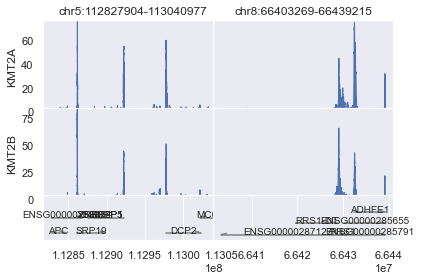

In [5]:
fs= {"KMT2A":"KMT2A_ENCFF406SHU.bigWig",
     "KMT2B":"KMT2B_ENCFF709UTL.bigWig"}
bed="roi.bed"
gff="gencode.v42.annotation.gff3"

re=ochip.plot_bigwig(fs,bed,gff, step=10)

```bash
python3 /<pathto>/omniplot/omniplot/scripts/gff2tss.py gencode.v40.annotation.gff3
```

removing enhancers around TSS took  2.8188915252685547
0.16595172882080078
85505045 85560966 85560945 55921 100
50356477 50434483 50434477 78006 100
32812996 32857562 32857496 44566 100
88477857 88536053 88535957 58196 100
87832477 87868639 87868577 36162 100


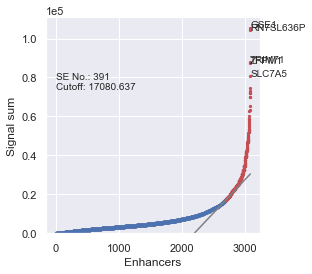

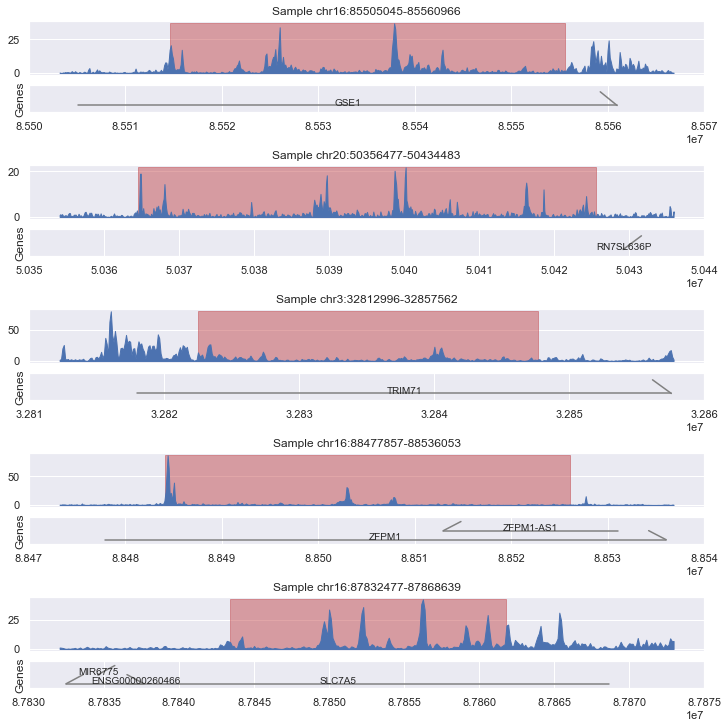

In [7]:
gff="gencode.v42.annotation.gff3"
f="KMT2A_ENCFF406SHU.bigWig"
peak="KMT2A_peaks_ENCFF960SAF_srt.bed"
ochip.call_superenhancer(bigwig=f, peakfile=peak,plot_signals=True,tss_dist=5000 , gff=gff,closest_genes=True)